<a href="https://colab.research.google.com/github/Rammani10Biswas/DS-project/blob/test-branch/amazonstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Amazon_Stocks.csv')
df.head()

,Date,Begining_price,Higest_price,Lowest_price,Closing_price,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [ ]:
#rename misspelled columns

new_name = {
    "Begining_price": "Beginning_price",
    "Higest_price": "Highest_price",
}
df.rename(columns=new_name, inplace=True)

In [ ]:
df.head()

,Date,Opening_price,Highest_price,Lowest_price,Closing_price,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])



In [ ]:
# Sort by date
df.sort_values(by='Date', inplace=True)


In [ ]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Date,Opening_price,Highest_price,Lowest_price,Closing_price,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1009 non-null   datetime64[ns]
 1   Opening_price  1009 non-null   float64       
 2   Highest_price  1009 non-null   float64       
 3   Lowest_price   1009 non-null   float64       
 4   Closing_price  1009 non-null   float64       
 5   Volume         1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


In [ ]:
# Split data into training and testing
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [ ]:
# ARIma
AR_model = ARIMA(train['Closing_price'], order=(5,1,0))
AR_result = AR_model.fit()
AR_pred = AR_result.forecast(steps=len(test))
AR_rmse = sqrt(mean_squared_error(test['Closing_price'], AR_pred))

In [ ]:
# SARIMA
SR_model = SARIMAX(train['Closing_price'], order=(1,1,1), seasonal_order=(1,1,1,12))
SR_result = SR_model.fit()
SR_pred = SR_result.forecast(steps=len(test))
SR_rmse = sqrt(mean_squared_error(test['Closing_price'], SR_pred))

In [ ]:
#optimal model
rmse = {'ARIMA': AR_rmse,
               'SARIMA': SR_rmse}
optimal = min(rmse)


In [ ]:
print("RMSE Values:", rmse)
print("Optimal Model:", optimal)

RMSE Values: {'ARIMA': 70.68440477464158, 'SARIMA': 72.68227602681685}
Optimal Model: ARIMA


In [ ]:
steps1 = 15
if optimal == 'ARIMA':
    forecast = AR_result.forecast(steps=steps1)
elif optimal == 'SARIMA':
    forecast = SR_result.forecast(steps=steps1)

<ipython-input-35-0542d5ae3a15>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=steps1, freq='M'), forecast, label='Forecasted Prices',color='black')


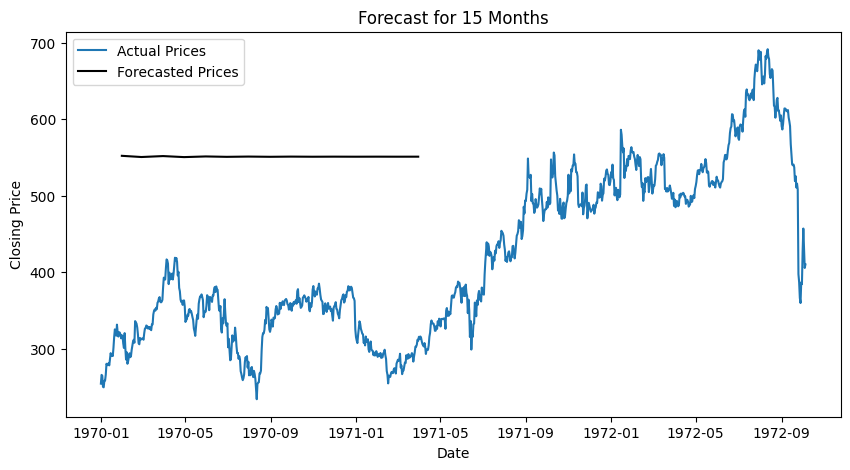

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Closing_price'], label='Actual Prices')
plt.plot(pd.date_range(df.index[-1], periods=steps1, freq='M'), forecast, label='Forecasted Prices',color='black')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Forecast for 15 Months")
plt.legend()
plt.show()